# Introduction

Sentiment analysis of ChatGPT among Twitter users from the months of November 2022 - April 2023



<img src="ChatGPT_logo.jpg" alt="Alternative text" />



By Edwin Isaac Torres, Justin Robinson, and Josue Velasquez

## What is Chat-GPT?

With the recent release of Chat GPT-4, many people are enthralled by the program's capabilities, and many are also expressing concerns regarding the implications that come with releasing a powerful AI open for anyone and everyone who desires it. What exactly is Chat-GPT? Chat GPT is an Artificial Intelligence chatbot developed and released by OpenAI, a research team of scientists and engineers working to further develop the capabilities of artificial intelligence. According to OpenAI Chat-GPT is powered by a deep learning model, which is a type of neural network designed to process and generate language. GPT learns by being fed large amounts of data and text which it processes and ‘learns’ to discuss and generate answers about that data in the same context in which it took in that data. With the increase in media coverage and it being in the public eye we as a society have started discussing the impacts on different areas of society such as; business, education, and even art.


## Why is it important to discuss?

The advancement of powerful natural language processing technology has come rapidly, opening up possibilities for its users and empowering people to do more with their computers. Chat-GPT 4 has been used to aid education, programming work, day-to-day inquiries, and can even be used for data analysis. Recently, the AI powering Chat GPT-4 has been used to code entire programs, and even create falsified videos and audio files. While the capabilities of the new AI are certainly incredible, its release to the public in the form of a chat-bot has also caused concern amongst many. Some concerns include its unlimited access to information that can out match a human counterpart easily, and scifi-like concerns about its ability to become more powerful than humans and overpower us. While AI sounds like something that is bound to a computer screen, many governments, such as Germany, have started drafting legislation in response to the development of AI’s such as Chat-GPT 4. Powerful AIs, such as Chat-GPT are here and how it is perceived and used everyday will dictate how we move forward with the new technology. 


## Purpose

The Purpose of this tutorial is to analyze the sentiments surrounding recent advancements in AI technology and determine the general attitude towards AI technology, such as Chat-GPT. Understanding this sentiment is crucial in guiding our future course of action for the development and release of subsequent AI tools, as well as the formulations of relevant policies that aim to mitigate potential risks associated with AI


## Hypothesis
We believe that the sentiment towards chat gpt has increased over time and is positive overall


<h2>Data Collection</h2>

With Chat-GPT arguably being one of the most popular and most discussed releases of AI software in recent history we decided to center our data collection around tweets from the popular social media platform Twitter. Specifically, we focused on tweets containing the hashtag '#ChatGPT' starting from the initial launch of the OpenAI chatbot in November 2022 until April 7th, 2023. Our analysis revolves around the tweet's contents, the number of likes it received, and the number of retweets it accumulated. By assessing the overall sentiment of each tweet as either positive or negative, we aim to determine the general perception of Twitter users regarding Chat-GPT.

<h2>Imports</h2>

In [6]:
#Add imports
import pandas as pd
import numpy as np
from textblob import TextBlob as tb
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler

## Collecting Data

Here we read the tweets from our .tsv file and store them in a DataFrame. We also dropped any columns that we don't need. Now we can focus more on the content of the tweets, the date on which they were created, and the likes and retweets of each tweet.

In [7]:
#read tweets into dataframe
df = pd.read_csv("archive/ChatGPT.csv",low_memory=False)

#remove unneccessary columns (subject to change)
df.drop(columns=['Unnamed: 0', 'Location', 'Description', 'UserCreated', 'UserVerified'], axis=1, inplace=True)

df.head()

,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes
0,2023-04-08 03:33:13+00:00,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,50.0,76.0,0,0
1,2023-04-08 03:32:16+00:00,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,9056.0,387.0,0,0
2,2023-04-08 03:32:05+00:00,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,276.0,313.0,0,0
3,2023-04-08 03:31:08+00:00,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,312.0,293.0,0,0
4,2023-04-08 03:30:51+00:00,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,522.0,684.0,0,2


## Data Processing

### Format Date Field

Here we formate the date field in a way that makes it easier to plot tweet data over time and convert the column from string to a datetime column.

In [8]:
#create datetime column for date
df['Date'] = df['Date'].str.extract(r'(\d{4}-\d{2}-\d{2})')
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes
0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,50.0,76.0,0,0
1,2023-04-08,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,9056.0,387.0,0,0
2,2023-04-08,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,276.0,313.0,0,0
3,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,312.0,293.0,0,0
4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,522.0,684.0,0,2


## Tweet Volume Over Time

<b>Group tweets by date and plot over time</b>

Here we group all tweets by date and use matplotlib to plot the tweet volume over time.

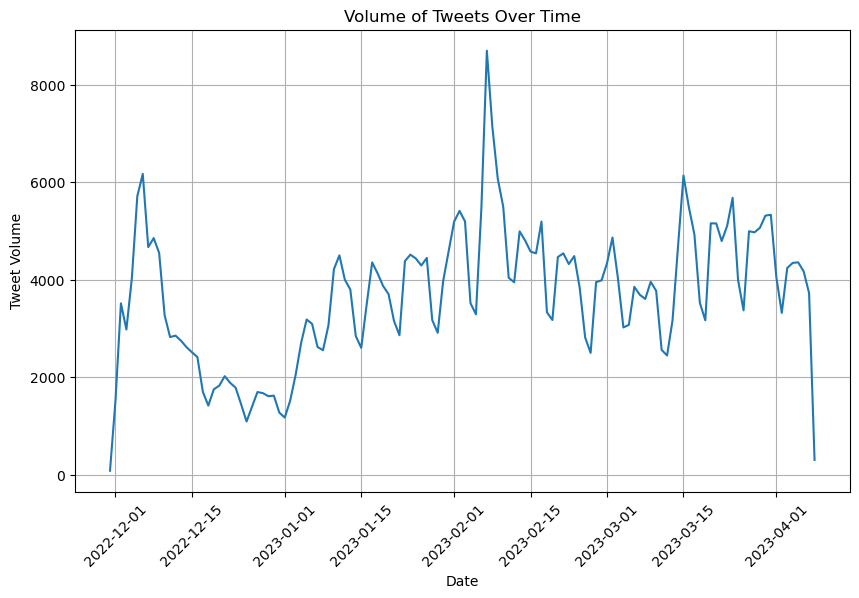

In [9]:
# Group by date and count the tweets
tweets_by_date = df.groupby('Date')['Tweet'].count()

# Create a line chart of the volume of tweets over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_by_date.index, tweets_by_date)
plt.xlabel("Date")
plt.ylabel("Tweet Volume")
plt.title("Volume of Tweets Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

It seems that while there has always been a decent number of tweets regarding ChatGPT there has been an increase in recent months as opposed to the start of the month. Specifically, there was a substantial increase in tweets on chatGPT in February 2023.

## Finding the attidue of tweets

<b>Use the TextBlob library to analyze tweet attitudes</b>

Here was pass all tweets in our data frame and use the TextBlob library to get sentiment scores for each tweet. The sentiment scores are stored in a new column called 'Sentiment' and are rated between -1 and 1. Sentiment analysis is useful in determining attitudes conveyed in large samples of text automatically. More information on sentiment analysis can be found 
[here](https://www.freecodecamp.org/news/what-is-sentiment-analysis-a-complete-guide-to-for-beginners/)

In [10]:
#create fucntion using textblob to gauge attitudes
def get_attitudes(tweet):
    result = tb(tweet)
    attitude = result.sentiment.polarity
    return attitude

In [11]:
#get the attitude score for each tweet
df['Tweet'] = df['Tweet'].astype(str)
df['Attitudes'] = df['Tweet'].apply(get_attitudes)
df.head()

,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes,Attitudes
0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,50.0,76.0,0,0,0.000000
1,2023-04-08,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,9056.0,387.0,0,0,0.466667
2,2023-04-08,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,276.0,313.0,0,0,0.170455
3,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,312.0,293.0,0,0,0.000000
4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,522.0,684.0,0,2,0.200000


## Classify Attitudes Into Positive Negative and Neutral

Here we group tweets by date and range of attitude, less than zero being negative, greater than zero being positive, and zero being neutral.

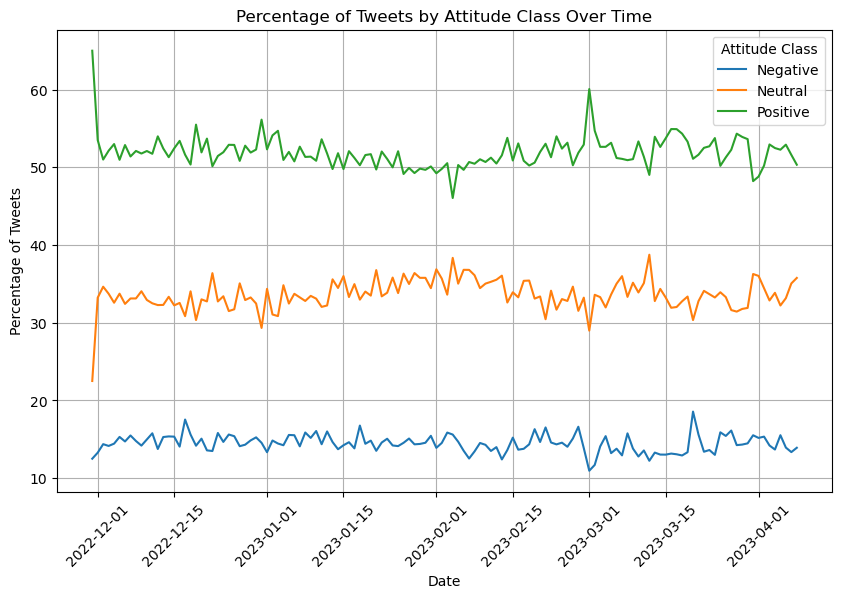

In [12]:
#Group attitudes into positive, negative, and neutral based on 
def classify_attitude(attitude):
    if attitude < 0:
        return 'Negative'
    elif attitude > 0:
        return 'Positive'
    else:
        return 'Neutral'
df['AttitudeClass'] = df['Attitudes'].apply(classify_attitude)

# Group by date and attitude class, then count the tweets
tweets_by_date_attitude = df.groupby(['Date', 'AttitudeClass'])['Tweet'].count().unstack()

# Calculate the total number of tweets per day
daily_total_tweets = tweets_by_date_attitude.sum(axis=1)

# Calculate the percentage of tweets for each attitude class
tweets_percentage_by_date_attitude = tweets_by_date_attitude.div(daily_total_tweets, axis=0) * 100

# Create a line chart of the percentage of tweets by attitude class over time
plt.figure(figsize=(10, 6))
plt.plot(tweets_percentage_by_date_attitude)
plt.xlabel("Date")
plt.ylabel("Percentage of Tweets")
plt.title("Percentage of Tweets by Attitude Class Over Time")
plt.xticks(rotation=45)

plt.legend(['Negative', 'Neutral', 'Positive'], title='Attitude Class')
plt.grid()
plt.show()

From the plot we can see that there are very clear divissions in the percentages of tweets for each sentiment category. Overall tweets expressing negative sentiment remian below 20%, neutral sentiment remian between 20% and 40%, and positive sentiment remian to be around 50% of all tweets.

## Normalize attiudes so we can compare more easily

We used the MinMaxScaler package from scikit-learn to normalize the attiudes between a range of 0 and 1. The reason for normalization is that the attiudes are usually between -1 and 1 which can make it difficult to manipulate the results. For example in the following code block we apply weights to tweets based on likes and retweets which may not be properly represented in the data had our range for the data remained between -1 and 1.

In [13]:
#normalize attitude scores
# Create a MinMaxScaler object
scalar = MinMaxScaler()

# Reshape the attitude scores
attitude_scores = df['Attitudes'].values.reshape(-1, 1)

# Perform the Min-Max scaling on the attitude scores
normalized_scores = scalar.fit_transform(attitude_scores)

# Update the column in the DataFrame with the normalized scores
df['Normalized_Attitudes'] = normalized_scores

## Give weights to likes and Retweets to calculate a popularity score

Now that our data was normalised, we can now apply weight to each tweet. The idea here is that a tweet that may be positive and has many likes and retweets should influence our data more than a tweet that is negative and has few to none likes and retweets. 

First we calculated popularity scores by applying a weight of .5 to each like, and weight of .2 to retweets, the idead being that a likes represent support for the sentiment of a tweet, and a retweet representing less support for a tweet.

Finally, we multiply each tweets sentiment score by their popularity score and get a final score for each tweet.

In [14]:
# Define weights to likes and retweets
like_weight = 0.5
rt_weight = 0.2

#convert likes and retweets to numeric values
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').fillna(0)
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce').fillna(0)

#calculated weighted scores
popularity = pd.DataFrame()
popularity['weighted_likes'] = df['Likes'] * like_weight
popularity['weighted_rt'] = df['Retweets'] * rt_weight

#get overall popularity score
df['Popularity_Score'] = popularity['weighted_likes'] + popularity['weighted_rt']

# Calculate the weighted score by multiplying the attitude score with the popularity score
df['weighted_score'] = df['Normalized_Attitudes'] * df['Popularity_Score']

df.tail()


,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes,Attitudes,AttitudeClass,Normalized_Attitudes,Popularity_Score,weighted_score
478342,2022-11-30,@OpenAI 's new #ChatGPT is insane\nPrompt: An ...,https://twitter.com/david_teather/status/15980...,david_teather,103.0,87.0,0.0,3.0,-0.431818,Negative,0.284091,1.5,0.426136
478343,2022-11-30,ChatGPT first look - https://t.co/16K2NlmOoY. ...,https://twitter.com/StuJLans/status/1598021893...,StuJLans,754.0,281.0,2.0,3.0,0.475000,Positive,0.737500,1.9,1.401250
478344,2022-11-30,OK so @OpenAI's new #ChatGPT can basically jus...,https://twitter.com/GuyP/status/15980207810655...,GuyP,32709.0,5611.0,4002.0,23176.0,0.278788,Positive,0.639394,12388.4,7921.067879
478345,2022-11-30,Just in! \n#ChatGPT - research early stage GPT...,https://twitter.com/mssawan/status/15980195482...,mssawan,170.0,246.0,1.0,1.0,0.100000,Positive,0.550000,0.7,0.385000
478346,2022-11-30,#ai Models are set to become the search engine...,https://twitter.com/ttuccoo/status/15980174391...,ttuccoo,121.0,402.0,1.0,2.0,0.000000,Neutral,0.500000,1.2,0.600000


## Plotting ditribution of attitude scores

<b>Plot the new normalized attitude scores</b>

Here using the newly calculated normalized attitude scores, we can plot them overtime to see where the majority of attitudes of each tweet lie.

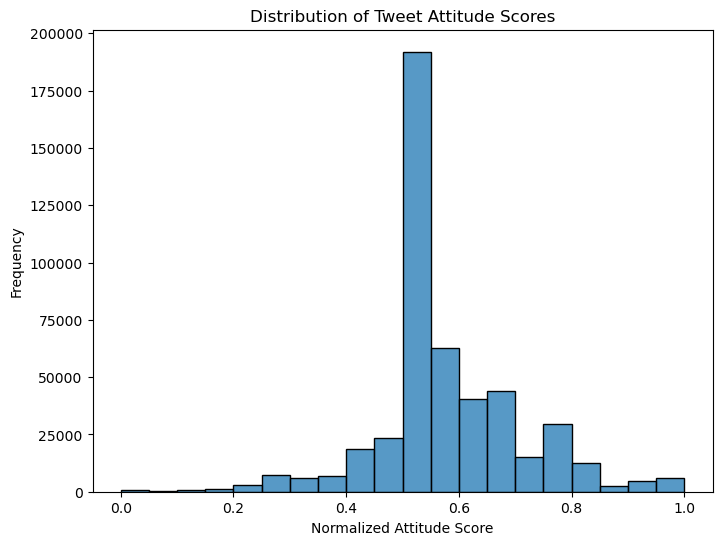

In [15]:
#plot the results
# Plot the distribution of tweet attitude scores
plt.figure(figsize=(8, 6))
sns.histplot(df['Normalized_Attitudes'], bins=20)
plt.xlabel('Normalized Attitude Score')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Attitude Scores')
plt.show()

From the plot we can see that a lot of the tweets posted have leaned in the positive direction, yet there is even more tweets that express a sentiment close to neutral.

## Cleanup DateTime Field

Now we craeted a new column from the date field so that we may focus more on tweets over the course of months as opposed to by individual days. 

In [16]:
#convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# #filter out the day portion of the date column for easier grouping
df['Month_Year'] = df['Date'].dt.strftime('%Y-%m')

df.head()


,Date,Tweet,Url,User,UserFollowers,UserFriends,Retweets,Likes,Attitudes,AttitudeClass,Normalized_Attitudes,Popularity_Score,weighted_score,Month_Year
0,2023-04-08,#ChatGPT If only there were a movie or somethi...,https://twitter.com/kirbydjohnson/status/16445...,kirbydjohnson,50.0,76.0,0.0,0.0,0.000000,Neutral,0.500000,0.0,0.0,2023-04
1,2023-04-08,"Workshop Description: In this workshop, you wi...",https://twitter.com/UniversityWeb/status/16445...,UniversityWeb,9056.0,387.0,0.0,0.0,0.466667,Positive,0.733333,0.0,0.0,2023-04
2,2023-04-08,New Post at AiNewsDrop!\n\nChatGPT is a doctor...,https://twitter.com/AiNewsDrop/status/16445436...,AiNewsDrop,276.0,313.0,0.0,0.0,0.170455,Positive,0.585227,0.0,0.0,2023-04
3,2023-04-08,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...,https://twitter.com/tubeblogger/status/1644543...,tubeblogger,312.0,293.0,0.0,0.0,0.000000,Neutral,0.500000,0.0,0.0,2023-04
4,2023-04-08,"""Classical art"" is struggling - not changed th...",https://twitter.com/majorradic/status/16445432...,majorradic,522.0,684.0,0.0,2.0,0.200000,Positive,0.600000,1.0,0.6,2023-04


## Violin plot of attitudes over time

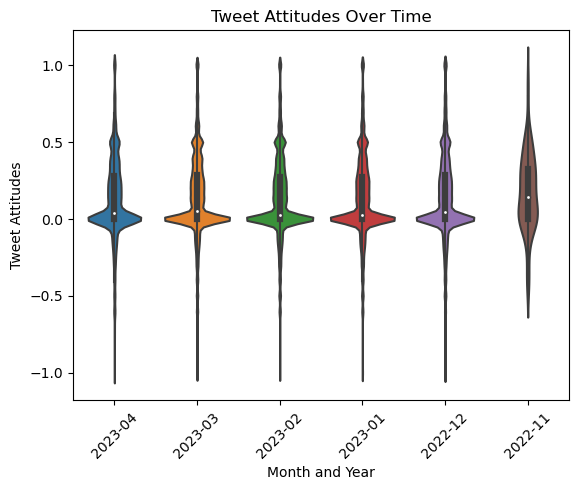

In [17]:
# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

sns.violinplot(x='Month_Year', y='Attitudes', data=df)
plt.xticks(rotation=45)
plt.xlabel('Month and Year')
plt.ylabel('Tweet Attitudes')
plt.title('Tweet Attitudes Over Time')
plt.show()

<b>Attitudes over time</b>

Here we use the seaborn library to create a violin plot of the distribution of tweet sentiment over time. We can see that the most variation comes from data for November of 2022, but every month after that, there continues to be a skew in the positive directions although less pronounced than the first month, and there is an increase in neutral tweets overall. Violin plots give an overview of the data's distribution by group, in this case by month. More information on violin plots can be found [here](https://chartio.com/learn/charts/violin-plot-complete-guide/).

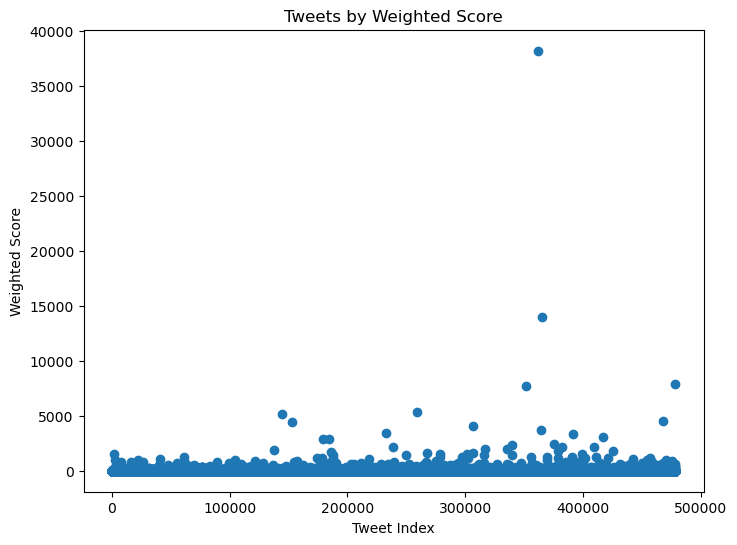

In [18]:
# Plot tweets by weighted score
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['weighted_score'])
plt.xlabel('Tweet Index')
plt.ylabel('Weighted Score')
plt.title('Tweets by Weighted Score')
plt.show()

Here the weighted scores of each tweet are close to zero, with the exception of about 8 tweets that separate significantly from the rest of the weighted scores, and only one tweet that is completely separated from the rest of the data. We noticed that many of the tweets that had higher weighted scores were linked to outside websites, this prompted us to look closer at tweets that instead were not linked to any outside websites which we take a look at in the code blocks that followed.

## Correlation plot 

<AxesSubplot: >

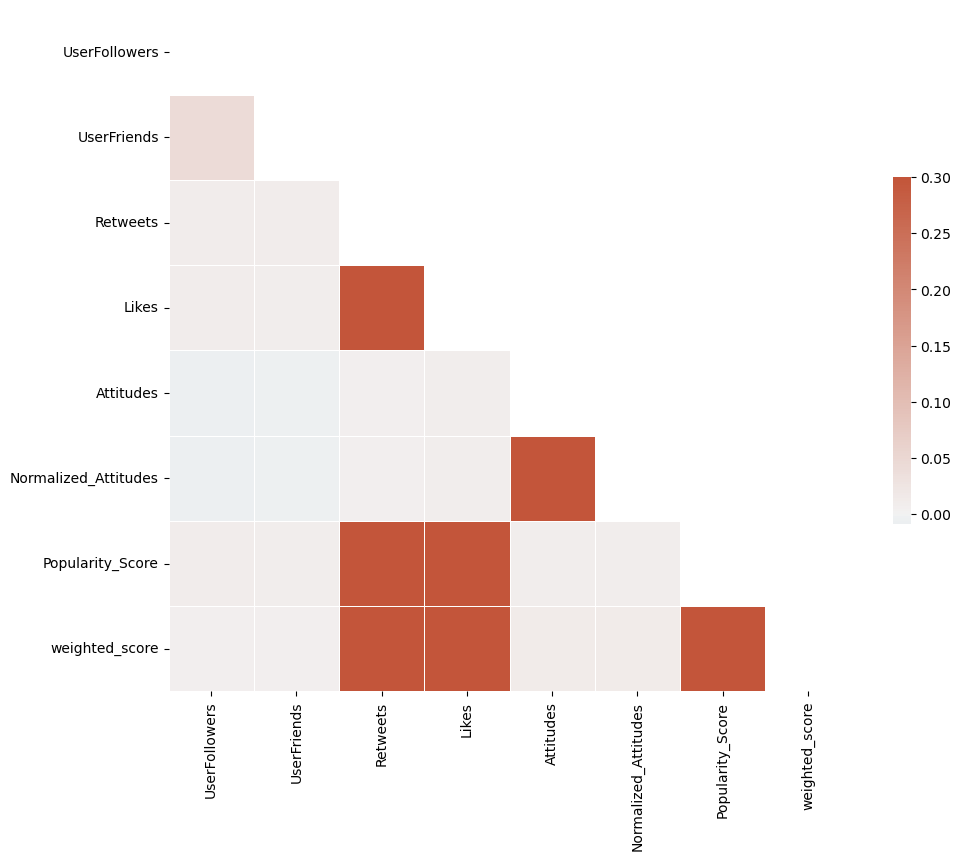

In [19]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = df_numeric.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In the correlation plot above we see some very obvious results for the most part, Likes and retweets correlate very highly, so does weighted score and popularity score, and so do normalized attitudes with the attitudes column. Unfortunately, it didn't reveal anything we wouldn’t have already suspected for our data. More information on correlation matrices can be found [here](https://www.statology.org/how-to-read-a-correlation-matrix/).

## Lets see if things change if we remove tweets with links

At this point we suspected that our data was being influenced by the amount of advertisements present in the data, so in response we removed any tweets containing links to outside websites. We anticipate that upon removal of those tweets we will find a more balanced spread of sentiments in both directions, we suspect that the advertisements in our data may have been skewing our data towards positive sentiment.

In [20]:
max_value = df['weighted_score'].max()
max_value_row = df[df['weighted_score'] == max_value]

print(max_value_row['Tweet'].values)


['Best AI Tools You Need To Know\n#chatgpt #chatgpt3 #ArtificialIntelligence #ai https://t.co/0jfr8cOMoo']


In [21]:
#Try removing tweets with links to avoid advertising
url_pattern = re.compile(r'https?://(?!twitter\.com)\S+|www\.(?!twitter\.com)\S+')

# Filter out entries containing URLs
df_f = df[~df['Tweet'].str.contains(url_pattern)]

max_value = df_f['weighted_score'].max()
max_value_row = df_f[df_f['weighted_score'] == max_value]

print(max_value_row)

             Date                                  Tweet  \
339346 2023-01-19  #ChatGPT would top all Indian exams !   

                                                      Url     User  \
339346  https://twitter.com/malpani/status/16160461697...  malpani   

        UserFollowers  UserFriends  Retweets   Likes  Attitudes AttitudeClass  \
339346        52399.0       2503.0     180.0  5603.0      0.625      Positive   

        Normalized_Attitudes  Popularity_Score  weighted_score Month_Year  
339346                0.8125            2837.5      2305.46875    2023-01  


In [22]:
print("Difference in amount of tweets with links and tweets with no links: " + str(len(df)- len(df_f)))

Difference in amount of tweets with links and tweets with no links: 318039


## Distribution of tweets without links 

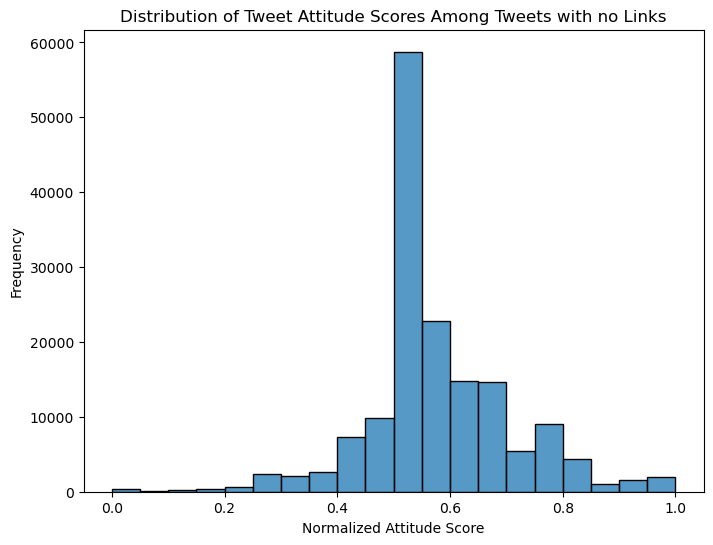

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df_f['Normalized_Attitudes'], bins=20)
plt.xlabel('Normalized Attitude Score')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Attitude Scores Among Tweets with no Links')
plt.show()


We found that the distribution didn't actually change much meaning that at least overall the two populations are similar in how they behave this was worth exploring to see if perhaps we had some factor influencing the perception that wasnt clear 

## Correlation plots for relevant features


Here we compare our normalized attitude score to the general metrics of popularity on twitter: likes, retweets, and follower count, as well as our customer weighted score metric.

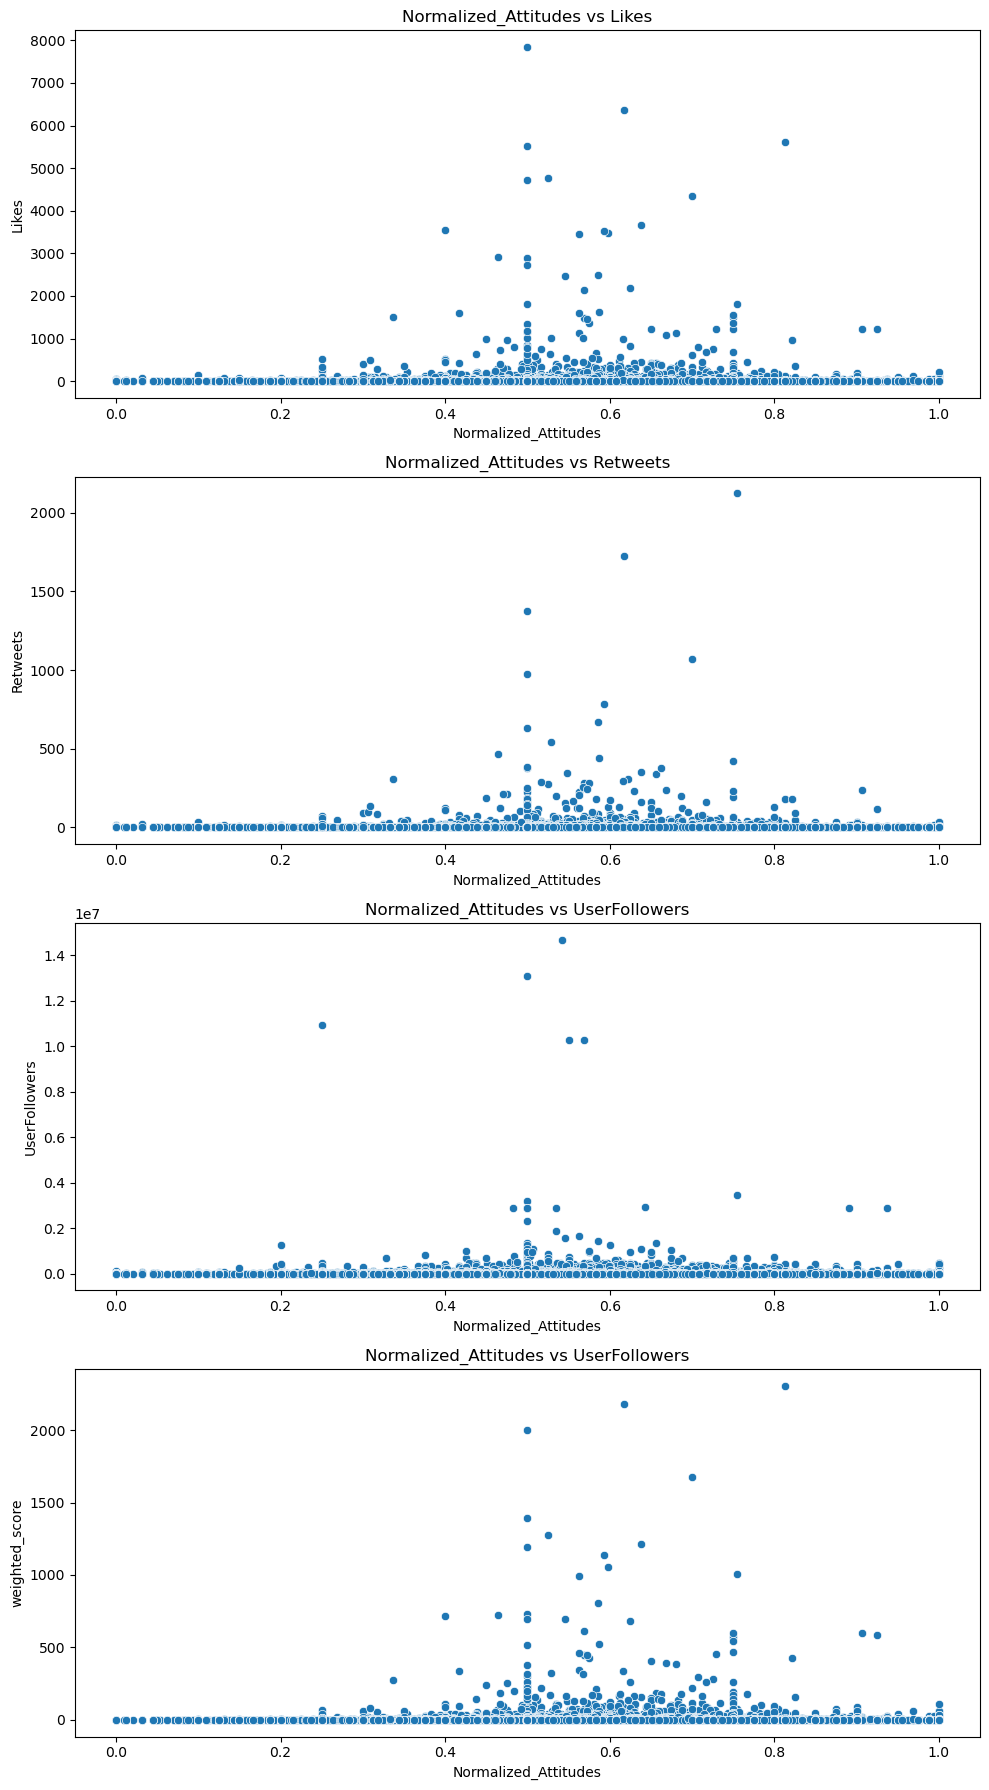

In [25]:
fig, axs = plt.subplots(4, 1, figsize=(10, 18))

# Scatter plot for Normalized_Attitudes and Likes
sns.scatterplot(x='Normalized_Attitudes', y='Likes', data=df_f, ax=axs[0])
axs[0].set_title('Normalized_Attitudes vs Likes')

# Scatter plot for Normalized_Attitudes and Retweets
sns.scatterplot(x='Normalized_Attitudes', y='Retweets', data=df_f, ax=axs[1])
axs[1].set_title('Normalized_Attitudes vs Retweets')

# Scatter plot for Normalized_Attitudes and UserFollowers
sns.scatterplot(x='Normalized_Attitudes', y='UserFollowers', data=df_f, ax=axs[2])
axs[2].set_title('Normalized_Attitudes vs UserFollowers')

# Scatter plot for Normalized_Attitudes and UserFollowers
sns.scatterplot(x='Normalized_Attitudes', y='weighted_score', data=df_f, ax=axs[3])
axs[3].set_title('Normalized_Attitudes vs UserFollowers')

plt.tight_layout()
plt.show()

Viewing the above scatter plots we notice a fairly even distribution across the spectrum of sentiment for tweets with low counts for likes, retweets, and followers for the users that posted them. As those metrics of popularity grow we do start to notice a  shift toward more positive attitudes, with users having the most engagement being more likely to have neutral or positive attitudes about ChatGPT. This could help explain the overall positive attitudes observed earlier, as users with the most engagement on the platform can have an outsized influence on the conversation on twitter.

## Insight and Conclusion
The final step of the data lifecycle is to draw conclusions based on our analysis. 
### to answer our Hypothesis: 


We were able to find that overall people on Twitter were fairly favorable towards chat gpt during the time frame we had data for.

 We saw that over time interest in chat gpt increased but the proportion of users that had a positive sentiment towards 
 chat gpt was about the same (~50 %)
And while this is great we had some doubts about whether or not all of these users were real people or not, after all, there is an incentive for people farm engagement so we decided to see if there was a difference in opinions on the population of our data of users who had links(potentially ads just a distinction we wanted to explore) even after this we found that it was about the same and by plotting the distribution of sentiment for each population we found the distribution was about the same. It is important to note that while these findings maybe relevant to perception of AI and ChatGPT as a whole, it is not indicative of the perception of the population as a whole. The demographic of the data may not be representative to the entire population of current society, or even to the population of twitter users as many people still are not familiar with AI technology.


Overall The conversation about ai and its implications on society is one that is still going on. the applications of ai have become evident to the point we can't stop discussing them. Over the next few years we will likely see a change in society similar to any other large adaptation of new technology and having conversations about how it affects everyone's lives is important.